<a href="https://colab.research.google.com/github/tfreyd/TensorflowCoursera/blob/main/C3/W4/assignment/C3_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [23]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 32.9MB/s]


In [24]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.2) )
model.add(Bidirectional(LSTM(64)))# Another LSTM Layer)
model.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words,activation='softmax'))# A Dense Layer)
# Pick an optimizer
optimizer='Adam'

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE
    
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 10, 128)           84480     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              3291275   
Total params: 3,927,767
Trainable params: 3,927,767
Non-trainable params: 0
____________________________________________

In [25]:
 history = model.fit(predictors,
                     label, 
                     epochs=100, 
                     verbose=1)

Epoch 1/100
484/484 [==============================] - 23s 23ms/step - loss: 6.9717 - accuracy: 0.0200
Epoch 2/100
484/484 [==============================] - 11s 24ms/step - loss: 6.5176 - accuracy: 0.0214
Epoch 3/100
484/484 [==============================] - 11s 24ms/step - loss: 6.4330 - accuracy: 0.0226
Epoch 4/100
484/484 [==============================] - 11s 24ms/step - loss: 6.3256 - accuracy: 0.0268
Epoch 5/100
484/484 [==============================] - 11s 24ms/step - loss: 6.2165 - accuracy: 0.0351
Epoch 6/100
484/484 [==============================] - 11s 24ms/step - loss: 6.1150 - accuracy: 0.0383
Epoch 7/100
484/484 [==============================] - 11s 24ms/step - loss: 6.0118 - accuracy: 0.0429
Epoch 8/100
484/484 [==============================] - 11s 24ms/step - loss: 5.8934 - accuracy: 0.0464
Epoch 9/100
484/484 [==============================] - 11s 24ms/step - loss: 5.7788 - accuracy: 0.0510
Epoch 10/100
484/484 [==============================] - 11s 24ms/step - l

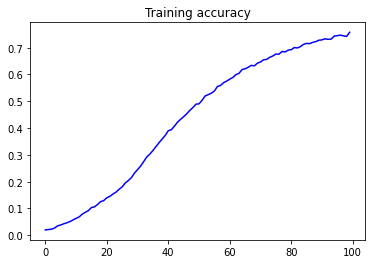

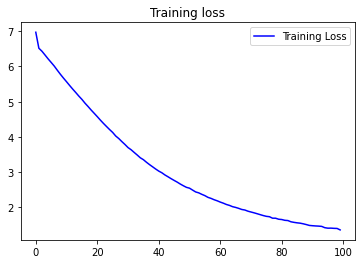

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [28]:
seed_text = "Help me Thibaud, you're the only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0),axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Thibaud, you're the only hope of thee confound confound seen store it near grow reap it wide cold age doth keep his shore sun fitted warm'd warm'd days had days days days days days common made her evident ' had hour die thence stand bear care new scorn is forth her sound they change be strange stand go rage must aside show thee true your friend do in their friend untrue shine bright doth true ' tell take thence die releasing thence find another groan alone with men find go groan of store all give disdain behind it had seen grow dead dead staineth light
